Cole Swierczek, Samuel Houpt, Patrick Mckeever

# The Best Neighborhood for Jaywalking in Pittsburgh

## by Bits-burgh 

![Clearly a time-old tradition](jaywalking.PNG)

## Intro

Walking is one of the most popular modes of transit in the entire world. In an increasingly car-dependent society, people are ignoring pedestrian infrastructure, or often what little of it exists, and have resorted to walking across the street illegally. One could fix this by increasing pedestrian infrastructure, but until that happens, people are going to jaywalk. So, the question becomes "whats the best place to do it?"

### Metrics

We're using three sub-metrics to determine the best neighborhood in Pittsburgh for jaywalking:

1. Traffic Data
2. Walkability Scores
3. Non-Traffic Citations


# First Metric - Traffic Data by Neighborhood
#### by Sam Houpt

Dataset: https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh

We will first load in the traffic count data from the .csv file.

In [23]:
import geopandas as gpd
import pandas as pd
import numpy as np

traffic_data = gpd.read_file('PersonalNotebooksData/trafficcount.csv')

traffic_data.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,geometry
0,1011743669,85,1445865260,2019-04-18,2019-04-26,4949,,6,StatTrak,25,...,40.45573295,Polish Hill,7,6,42003060500,6,6,2,2-6,None
1,1026101993,140,1121444006,2019-01-24,,,,,Intersection Study,,...,40.46615676,Central Lawrenceville,7,9,42003090200,2,9,2,3-6,None
2,1032382575,11,1539892711,2018-08-28,2018-09-04,,,,,35,...,40.46071714,Windgap,2,28,42003563000,5,28,6,1-16,None
3,103627606,9,734195080,2018-07-17,2018-08-01,2741,,,StatTrak,25,...,40.43737854,Squirrel Hill South,5,14,42003140800,3,14,4,2-18,None
4,1039546167,144,,,,,,,,,...,40.49079426,Perry North,1,26,42003260200,1,26,1,1-15,None


Next, we'll filter out only the important information.

In [24]:
traffic = pd.DataFrame(columns = ['Average Daily Car Traffic', 'Neighborhood'])
traffic['Average Daily Car Traffic'] = traffic_data['average_daily_car_traffic']
traffic['Neighborhood'] = traffic_data['neighborhood']

traffic.head()

,Average Daily Car Traffic,Neighborhood
0,4949,Polish Hill
1,,Central Lawrenceville
2,,Windgap
3,2741,Squirrel Hill South
4,,Perry North


Now to sort the data in ascending order to see which neighborhoods have the least average daily car traffic. First, we need to drop the cells with blank values. We have to use numpy for this dataset because the blank cells are simply empty strings, which Pandas doesn't recognize as having a value of null.

In [25]:
traffic['Average Daily Car Traffic'].replace('', np.nan, inplace = True)
traffic['Neighborhood'].replace('', np.nan, inplace = True)
traffic.dropna(subset = ['Average Daily Car Traffic'], inplace = True)
traffic.dropna(subset = ['Neighborhood'], inplace = True)

Then, we need to replace values in the column with ints instead of Strings so that the sort_values method functions properly.

In [26]:
traffic['Average Daily Car Traffic'] = traffic['Average Daily Car Traffic'].astype(int)
traffic_sorted = traffic.sort_values('Average Daily Car Traffic', ascending = True)
traffic_sorted.head(15)

,Average Daily Car Traffic,Neighborhood
182,23,Central Northside
251,58,East Liberty
307,63,Spring Hill-City View
247,77,Bloomfield
258,79,Highland Park
244,79,Bloomfield
321,109,Marshall-Shadeland
310,115,South Side Flats
318,126,Lincoln Place
158,131,Windgap


But wait, some of these values have duplicate neighborhoods. Here's a quick fix that takes the average daily traffic for all neighborhoods for every day that was recorded. 

In [27]:
traffic_new = traffic_sorted.groupby('Neighborhood').mean()
traffic_final = traffic_new.sort_values('Average Daily Car Traffic', ascending = True)
traffic_final.head(10)

,Average Daily Car Traffic
Neighborhood,
South Side Flats,115.000000
Lincoln Place,126.000000
Lincoln-Lemington-Belmar,195.000000
Fineview,419.000000
Allegheny West,477.000000
New Homestead,666.000000
Overbrook,777.000000
Summer Hill,937.000000
Upper Hill,953.333333


Therefore, South Side Flats is the neighborhood with the least average daily car traffic. 

Let's get a better idea of the best neighborhoods by plotting the top 20 in terms of lowest daily car traffic.

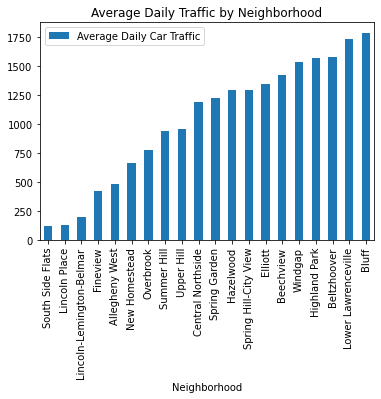

In [128]:
plot = traffic_final.iloc[:20].plot(kind='bar', y='Average Daily Car Traffic', title = 'Average Daily Traffic by Neighborhood')

Here's the bottom 20 neighborhoods:

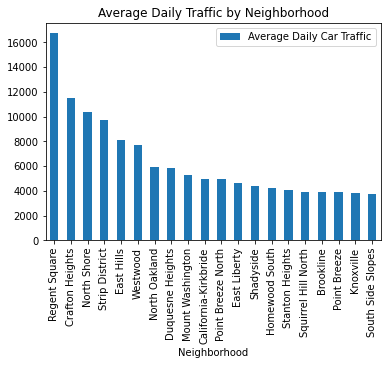

In [69]:
traffic_desc = traffic_final.sort_values('Average Daily Car Traffic', ascending = False)
plot2 = traffic_desc.iloc[:20].plot(kind='bar', y='Average Daily Car Traffic', title = 'Average Daily Traffic by Neighborhood')

Great - we now know which neighborhoods have the best and worst car traffic. Obviously, neighborhoods with less cars flying down the streets are going to be easier to jaywalk in, so lets rank them from best to worst, and throw it into a dataframe. 

In [111]:

#creating the new dataframe and iterating through the traffic dataframe to rank
CM = pd.DataFrame(columns = ['Neighborhood', 'Traffic Rank', 'Walk Score Rank', 'Non-Traffic Citation Rank'])

i = 0
for index, row in traffic_new.iterrows():
    CM.at[i,'Neighborhood'] = index
    i+= 1

tRank = 1
for index, row in traffic_final.iterrows():
    CM.loc[CM['Neighborhood']==index, "Traffic Rank"] = tRank
    tRank+=1
CM.sort_values("Traffic Rank").head(10)

,Neighborhood,Traffic Rank,Walk Score Rank,Non-Traffic Citation Rank
50,South Side Flats,1,NaN,NaN
31,Lincoln Place,2,NaN,NaN
32,Lincoln-Lemington-Belmar,3,NaN,NaN
22,Fineview,4,NaN,NaN
1,Allegheny West,5,NaN,NaN
38,New Homestead,6,NaN,NaN
41,Overbrook,7,NaN,NaN
59,Summer Hill,8,NaN,NaN
60,Upper Hill,9,NaN,NaN
13,Central Northside,10,NaN,NaN


# Metric 2 - Walkability of Pittsburgh

## By Cole Swierczek

[The Data](https://data.wprdc.org/dataset/allegheny-county-walk-scores)

If you're going to jaywalk somewhere, you need a good place to jaywalk *to*. This dataset uses different metrics to determine how "walkable" a neighborhood is. These include - distance from amenities, population density, intersection density, so on and so forth. This dataset provides those walk scores (0-100) for each census tract using DASH data guidelines (Dash meaning Allegheny County Data Across Sectors for Health). The first thing we need to do is set up pandas for data visualization and then create a dataframe for the csv file.

In [114]:

#reading in the csv file
walkable = pd.read_csv('PersonalNotebooksData/walkscorect.xls-walk-score-by-ct.csv')
#demonstrating that its working as intended
walkable.head(10)

,Census Tract,Walk Score
0,10300,82
1,20100,100
2,20300,83
3,30500,77
4,40200,71
5,40400,82
6,40500,78
7,40600,75
8,40900,68
9,50100,60


**Great!**

But this isn't really useful, like at all. We need to know which *neighborhood* has the best walk score, not which census tract. Also, this is data for all of allegheny county, and we want just Pittsburgh. Luckily, through the Pitt Library system, we can find a csv that has a list of Pittsburgh census tracts from 1940-2020. 
[Here](https://pitt.libguides.com/uscensus/pghcensustracts) 

In [116]:
pittcensus = pd.read_csv('PersonalNotebooksData/Pittsburgh_Census_Tracts_1940-2020.csv', encoding= 'cp1252')
pittcensus.head(10)

,Allegheny Center,2020,5627
0,NaN,2010.0,5627
1,NaN,2000.0,2204
2,NaN,1990.0,2204
3,NaN,1980.0,"(.03) *2201, 2204, (.02) *2205"
4,NaN,1970.0,"(.03) *2201, 2204, (.02) *2205"
5,NaN,1960.0,"(.03) *22A, 22D, 22E, (.02) *22G"
6,NaN,1950.0,"(.03) *22A, 22D, 22E, (.02) *22G"
7,NaN,1940.0,"(.03) *22A, 22D, 22E, (.02) *22G"
8,Allegheny West,2020.0,5627
9,NaN,2010.0,5627


Ok, so we've read in our next dataset, but theres some issues. The column names are all wrong because the original csv doesn't have any labels, and theres this mysterious "not a number" value in the leftmost neighborhood column. Lets fix all of that first. 

In [117]:
#little wonky - pandas thinks the top row of information is the names of our columns
newRow = pd.DataFrame({'Allegheny Center':'Allegheny Center','2020':2020,'5627':5627}, index = [0]) #duplicating the first row 

pittcensus= pd.concat([newRow,pittcensus.loc[:]]).reset_index(drop=True) #concatinating the duplicated row
pittcensus.columns=['Neighborhood', 'Census Year','Census Tracts'] #renaming the top row so the columns are correctly titled

#Iterating through the neighborhoods with no name listed and properly labeling them
curNeigh = pittcensus["Neighborhood"][0]
pittcensus["Neighborhood"] = pittcensus["Neighborhood"].fillna(0)
for index, row in pittcensus.iterrows():
    if row['Neighborhood'] == 0:
        pittcensus.at[index,'Neighborhood']=curNeigh
    else:
        curNeigh = row['Neighborhood']
pittcensus.head(20)

,Neighborhood,Census Year,Census Tracts
0,Allegheny Center,2020.0,5627
1,Allegheny Center,2010.0,5627
2,Allegheny Center,2000.0,2204
3,Allegheny Center,1990.0,2204
4,Allegheny Center,1980.0,"(.03) *2201, 2204, (.02) *2205"
5,Allegheny Center,1970.0,"(.03) *2201, 2204, (.02) *2205"
6,Allegheny Center,1960.0,"(.03) *22A, 22D, 22E, (.02) *22G"
7,Allegheny Center,1950.0,"(.03) *22A, 22D, 22E, (.02) *22G"
8,Allegheny Center,1940.0,"(.03) *22A, 22D, 22E, (.02) *22G"
9,Allegheny West,2020.0,5627


Cool, now our dataset is formatted properly! However, we only care about the 2010 census, because thats when our walkability scores were made. We need to filter out all the others. Also, the walk scores are for all of Allegheny County, and we only care about Pittsburgh, so we need to get rid of those too. We can do this by matching the census tracts in the walkability score dataset to the census tracts in the Pittsburgh Census Tracts data set, and then storing them in a dictionary data structure.


In [118]:
#Obtaining Census tracts for 2010 in pittsburgh
pittcensus = pittcensus.loc[pittcensus['Census Year'] == 2010]

#Filtering out the Allegheny county walk data for just pittsburgh walk data
census_dict = dict()
for index, row in walkable.iterrows():
    for i, r in pittcensus.iterrows():
        if str(int(row['Census Tract']/100)) in r['Census Tracts']:
            if r['Neighborhood'] in census_dict:
                census_dict[r['Neighborhood']].append(row['Walk Score'])
            else:
                census_dict[r['Neighborhood']]=[row['Walk Score']]
print(census_dict)

{'Bluff': [82], 'New Homestead': [82, 2], 'Golden Triangle/Civic Arena': [100], 'Lincoln-Lemington-Belmar': [83, 37, 25, 72, 35], 'Strip District': [83], 'Crawford-Roberts': [77], 'Squirrel Hill North': [71, 66, 72, 80], 'Terrace Village': [71, 58, 62], 'West Oakland': [71], 'North Oakland': [82, 75], 'Point Breeze': [82, 75, 54, 68, 51], 'Central Oakland': [78, 75], 'Point Breeze North': [78, 72], 'Troy Hill': [75, 68], 'South Oakland': [68, 74], 'Middle Hill': [60], 'Upper Hill': [74], 'Bedford Dwellings': [77], 'Fineview': [77, 54], 'Lower Lawrenceville': [91], 'Polish Hill': [88], 'Brighton Heights': [91, 88, 48, 55, 43], 'Shadyside': [91, 88, 77, 88, 89], 'South Side Slopes': [77, 65, 65], 'Bloomfield': [82, 86, 82, 86, 86], 'Perry North': [86, 26, 29, 29], 'Chateau': [82, 62], 'Friendship': [86], 'Mount Washington': [86, 86, 65, 77, 71, 45], 'South Shore': [86, 72], 'Marshall-Shadeland': [86, 48, 45, 35], 'Carrick': [72, 86, 48, 49, 65], 'Central Lawrenceville': [72, 86, 54], 'St

Ok, so now we have our dictionary of Neighborhoods and their multiple walkability scores, because some neighborhoods have multiple census tracts. The issue is, we want *one* per neighborhood. So lets average them.

In [119]:
#averaging the walk scores for all of the neighborhoods
d = census_dict.items()
for k, v in d:
    keyVal = 0
    count = 0
    for value in v:
        keyVal+= value
        count+=1
    census_dict[k] = [keyVal/count]
print(census_dict)

{'Bluff': [82.0], 'New Homestead': [42.0], 'Golden Triangle/Civic Arena': [100.0], 'Lincoln-Lemington-Belmar': [50.4], 'Strip District': [83.0], 'Crawford-Roberts': [77.0], 'Squirrel Hill North': [72.25], 'Terrace Village': [63.666666666666664], 'West Oakland': [71.0], 'North Oakland': [78.5], 'Point Breeze': [66.0], 'Central Oakland': [76.5], 'Point Breeze North': [75.0], 'Troy Hill': [71.5], 'South Oakland': [71.0], 'Middle Hill': [60.0], 'Upper Hill': [74.0], 'Bedford Dwellings': [77.0], 'Fineview': [65.5], 'Lower Lawrenceville': [91.0], 'Polish Hill': [88.0], 'Brighton Heights': [65.0], 'Shadyside': [86.6], 'South Side Slopes': [69.0], 'Bloomfield': [84.4], 'Perry North': [42.5], 'Chateau': [72.0], 'Friendship': [86.0], 'Mount Washington': [71.66666666666667], 'South Shore': [79.0], 'Marshall-Shadeland': [53.5], 'Carrick': [64.0], 'Central Lawrenceville': [70.66666666666667], 'Stanton Heights': [28.5], 'Upper Lawrenceville': [49.0], 'Morningside': [40.0], 'Garfield': [62.3333333333

## Shazam! 
Just like that, we have a dictionary containing every neighborhood and its average walkability score according to the allegheny dataset. Still, this is rough to look at, so lets throw it into a new dataframe and sort it. 

In [120]:
df = pd.DataFrame.from_dict(data=census_dict, orient = 'index', columns = ['Walk Score'])
df = df.sort_values("Walk Score", ascending = False)

Ok, so we have our dataframe of walk scores in descending order. Lets visualize it - plot all of the neighborhoods!

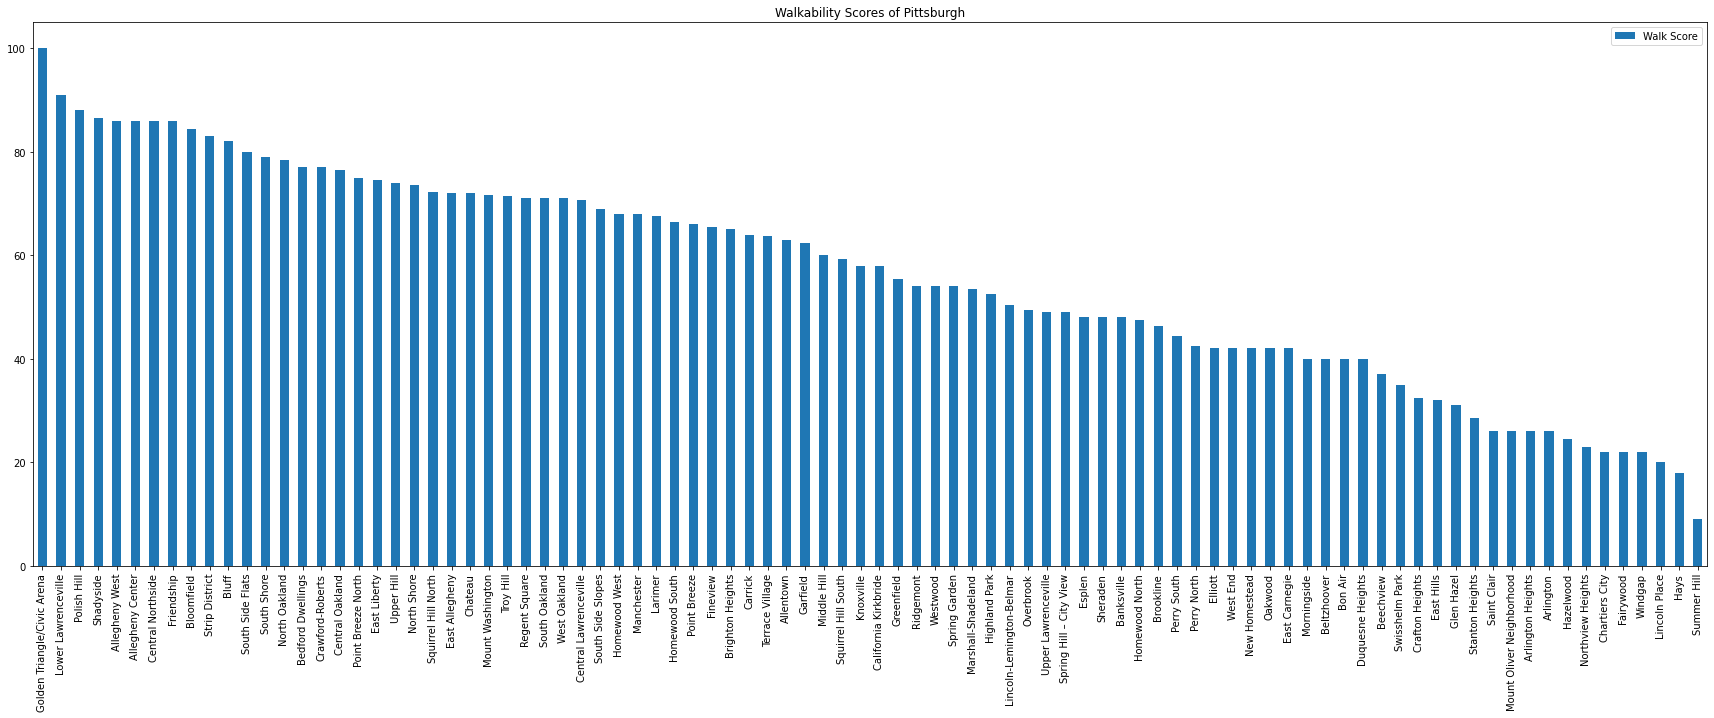

In [121]:
df.plot.bar(figsize = (30, 10), y='Walk Score', title= 'Walkability Scores of Pittsburgh')

Woah. Lets make this a bit more managable

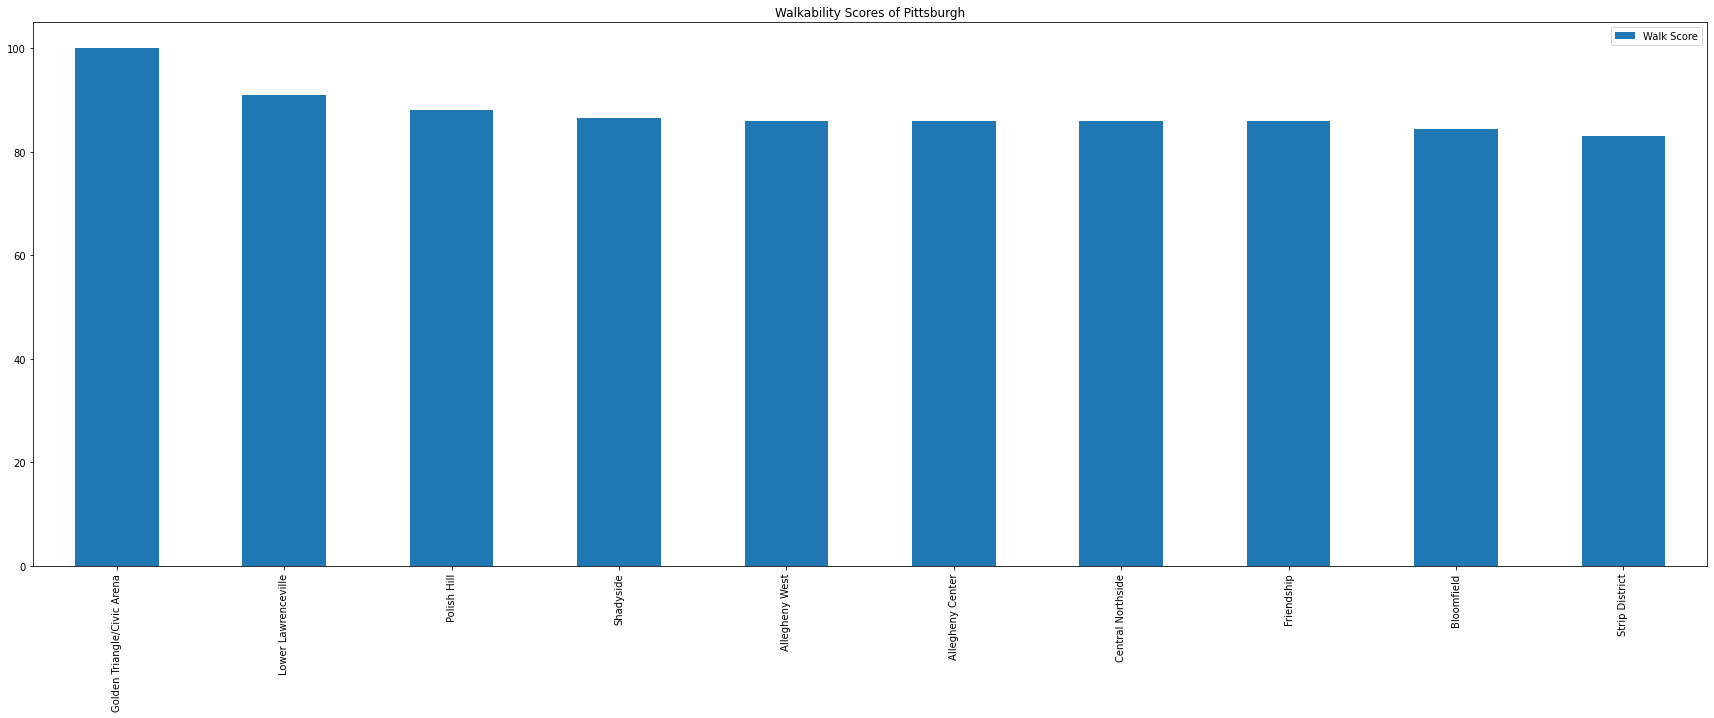

In [122]:
df.iloc[:10].plot.bar(figsize = (30, 10), y='Walk Score', title= 'Walkability Scores of Pittsburgh')

**Now that we've ranked traffic and have the data for walkability, lets rank walkability and add it to the final dataframe!**


In [129]:
wRank = 1
for index, row in df.iterrows():
    CM.loc[CM['Neighborhood']==index, "Walk Score Rank"] = wRank
    wRank+=1

# Final Metric - Which neighborhood makes for the most pleasant walk?
### By Patrick McKeever
### Datasets: [Non-Traffic-Citations](https://data.wprdc.org/dataset/non-traffic-citations), [Neighborhood Size](https://data.wprdc.org/dataset/neighborhoods2)
## This data includes non-traffic citations by neighborhood for harassment, property damage, littering, excessive noise, disorderly conduct, public intoxication, and more since 2015.

In [131]:
# Loading in the data
citations = pd.read_csv('PersonalNotebooksData/Non-Traffic-Citations.csv')

# Removing non-neighborhoods from the dataset
citations = citations[citations['NEIGHBORHOOD']!= 'Outside County']
citations = citations[citations['NEIGHBORHOOD']!= 'Outside State']
citations = citations[citations['NEIGHBORHOOD']!= 'Unable To Retrieve Address']

# counting the # of citations commited in each neighborhood
counts = citations.groupby('NEIGHBORHOOD').count()['OFFENSES']

#sorting and printing these values
pd.set_option('display.max_rows', 10)
counts = counts.sort_values(ascending=False)
print(counts)

NEIGHBORHOOD
South Side Flats             3269
Central Business District    1767
Central Oakland               650
North Shore                   542
Carrick                       411
                             ... 
Ridgemont                       4
Mt. Oliver Neighborhood         4
St. Clair                       3
Mt. Oliver Boro                 2
Chartiers City                  2
Name: OFFENSES, Length: 94, dtype: int64


#### The neighborhoods high in citations are also some of the largest neighborhoods in all of Pittsburgh, compared to the small neighborhoods low in citations. To fairly assess the safety of these neighborhoods, they need to be weighted by size. In a small neighborhood like Chartiers City, there aren't many citations, but there also isn't much area to walk in. I'll divide each citation amount by the square miles of each neighborhood for the final metric.

In [133]:
# Loading in the data
size = pd.read_csv('PersonalNotebooksData/Size.csv')

# Limiting the dataframe to just the neighborhood and its size
size = size.loc[:, ['hood', 'sqmiles']]

# Merging the size data with the citation data
size = size.rename(columns={'hood': 'NEIGHBORHOOD'})
merged = pd.merge(size, counts, on='NEIGHBORHOOD')
merged = merged[merged['sqmiles']!= 0]
merged = merged.rename(columns={'OFFENSES': 'Citations'})
merged = merged.rename(columns={'NEIGHBORHOOD': 'Neighborhood'})

# Creating a new columnn for the final metric
merged['Citations/sqmile'] = merged['Citations']/merged['sqmiles']

# Displayingb the data
merged = merged.sort_values(by='Citations/sqmile', ascending = False)
print(merged)

                 Neighborhood  sqmiles  Citations  Citations/sqmile
86           South Side Flats    0.936       3269       3492.521368
42  Central Business District    0.640       1767       2760.937500
45            Central Oakland    0.281        650       2313.167260
29                North Shore    0.303        542       1788.778878
43             East Allegheny    0.236        342       1449.152542
..                        ...      ...        ...               ...
80             Swisshelm Park    0.480          6         12.500000
63                  Ridgemont    0.369          4         10.840108
37              New Homestead    0.794          8         10.075567
71                  St. Clair    0.310          3          9.677419
25                       Hays    1.750          8          4.571429

[87 rows x 4 columns]


### Here are the 15 least pleasant neighborhoods to walk in Pittsburgh according to citations/sqmile since 2015.

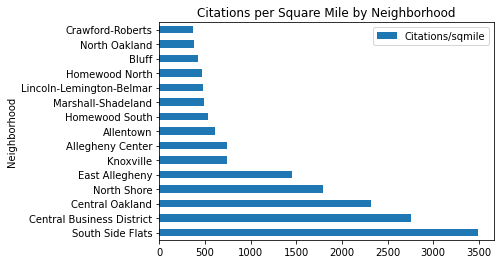

In [134]:
plt = merged.iloc[:15].plot(kind='barh', x="Neighborhood", y="Citations/sqmile", title="Citations per Square Mile by Neighborhood")

### And here are the 15 most pleasant neighborhoods.

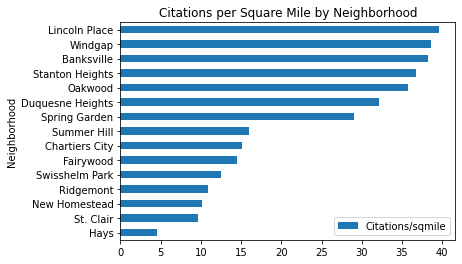

In [135]:
merged_reverse = merged.sort_values(by='Citations/sqmile')
plt = merged_reverse.iloc[:15].plot(kind='barh', x="Neighborhood", y="Citations/sqmile", title="Citations per Square Mile by Neighborhood")

**Ok**, so now we know which neighborhoods have the most traffic, which neighborhoods are the most walkable, and which neighborhoods are the *nicest to walk through*. There's a distinction between the last two metrics - one is measuring how feasible it is to be a pedestrian, and the other is measuring disturbances in the area to determine the nicest and safest areas.

# Determining the Final Verdict

Its finally time to determine the best neighborhood for jaywalking. First, lets rank our Non-traffic citations, and then see what we can do from there. 

In [156]:
nRank = 1
for index, row in merged_reverse.iterrows():
    CM.loc[CM["Neighborhood"]==row['Neighborhood'], "Non-Traffic Citation Rank"] = nRank
    nRank += 1
CM.sort_values("Non-Traffic Citation Rank").head(10)

,Neighborhood,Traffic Rank,Walk Score Rank,Non-Traffic Citation Rank
35,New Homestead,6,66,3
12,Chartiers City,35,85,7
53,Summer Hill,8,90,8
48,Spring Garden,11,50,9
14,Duquesne Heights,57,72,10
51,Stanton Heights,50,78,12
57,Windgap,16,87,14
28,Lincoln Place,2,88,15
23,Highland Park,17,52,16
56,Westwood,59,49,17


There is an immediate problem with our final dataset - some neighborhoods just don't have some data. Unfortunately, the datasets all covered different amounts of pittsburgh neighborhoods, so lets just filter out the ones that are missing any values. We could just set missing values to zero, or some extremely large number, but those wouldn't be real representations of their sub-metrics, and so we chose to remove them entirely.

In [155]:
CM = CM.dropna().reset_index(drop=True)
#drops any row with NaN (missing value)

The easiest way to see which neighborhood is the best for jaywalking, is to see which neighborhood as the lowest average rank. Heres the thing though - because we know the formula for calculating the average will always be 

**total score/#ranks**

we can just skip dividing by the #ranks because it will be the same for all of them. In this case, we can just pick the neighborhood with the *lowest* total. Lets make the new column from the old ones, and then sort the dataframe by that column in ascending order. 

In [163]:
CM["Total Score"] = CM["Traffic Rank"] + CM["Walk Score Rank"] + CM["Non-Traffic Citation Rank"]
CM.sort_values("Total Score").head(10)

,Neighborhood,Traffic Rank,Walk Score Rank,Non-Traffic Citation Rank,Total Score
1,Allegheny West,5,5,36,46
30,Lower Lawrenceville,19,2,26,47
54,Upper Hill,9,20,29,58
42,Polish Hill,37,3,25,65
48,Spring Garden,11,50,9,70
35,New Homestead,6,66,3,75
23,Highland Park,17,52,16,85
19,Fineview,4,37,44,85
38,Overbrook,7,54,24,85
20,Friendship,33,8,46,87


# Boom! Allegheny West Wins!

## Our Concluding Thoughts - 


### Cole:

I'm not entirely surprised with this result. I could tell from the first two rankings that Allegheny west would take an early lead over just about any other neighborhood in the city. In addition to this, its location on the north side right next to the rivers places it in prime walking territory for getting around town. I come from an area where you need to drive everywhere you go. I cannot get anything without hopping in the car for atleast ten minutes. This is another reason I am not surprised with the winner being an inner-city neighborhood. If the datasets were more complete, I'd be curious to see how downtown pittsburgh stands against allegheney west, as it ranked #1 in the walkability score dataset. 

### Sam:

This result makes a lot of sense. As Cole said, it makes sense for a neighborhood next to downtown and the rivers to have a great walkability score. In addition, it's one of the quieter areas in the city, meaning there is a lot less traffic activity. The only surprising part to me was how that the neighborhood ranked much lower for non-traffic citations than the other two metrics. Overall, it was interesting to see how each of our datasets compared against each other and how this led to the final result.

### Pat:

I thought it was interesting to see how easily walkable neighborhoods overlapped with high-citation neighborhoods. It seemed like their high amount of citations would take them out of the overall ranking when looking at neighborhoods like Southside and Oakland. But these neighborhoods at the top proved you can be easily walkable while still not having tons of citations.